In [1]:
from ete3 import PhyloTree
from ete3 import Tree,TreeStyle,NodeStyle
import pandas as pd
import os
import re
import numpy as np
import string
from ete3 import Tree, faces, TreeStyle, NodeStyle
from ete3 import ClusterTree, RectFace, AttrFace, ProfileFace, TextFace
from ete3.treeview.faces import add_face_to_node
import colorsys
import random
from pathlib import Path

In [2]:
# Genreate a color randomly
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color

In [3]:
taxonomy = pd.read_table("/scale03/fs0/gpfs0/research/dsi-find/mlk442/correlation_table/taxonomy.txt", sep = "\t")
taxonomy.head(10)

,MaterialLabel,MGx Selected,Genus,species,ID
0,DA002F0001,NO,Streptomyces,albus,NaN
1,DA003H0001,NO,Streptomyces,anulatus,NaN
2,DA004A0004,YES,Streptomyces,sp,rpoB
3,DA004C0003,NO,Streptomyces,sp,NaN
4,DA004E0001,YES,Amycolatopsis,japonica,rpoB
5,DA006D0002,NO,Streptomyces,sp,NaN
6,DA006D0003,NO,Streptomyces,sp,NaN
7,DA007H0001,NO,Streptomyces,sp,NaN
8,DA007L0001,NO,Klenkia,brasiliensis,NaN
9,DA007M0001,NO,Streptomyces,sp,NaN


In [4]:
strainName = taxonomy.MaterialLabel+ " "+taxonomy.Genus +" "+ taxonomy.species
GenusSpecies = taxonomy.Genus
dict_strain = dict(zip(taxonomy.MaterialLabel.tolist(), strainName))
GenusSpecies

0           Streptomyces
1           Streptomyces
2           Streptomyces
3           Streptomyces
4          Amycolatopsis
             ...        
833         Streptomyces
834         Streptomyces
835       Micromonospora
836           Nonomuraea
837    Streptosporangium
Name: Genus, Length: 838, dtype: object

In [5]:
#Creat color map for each 
GenusSpeciesUniq = GenusSpecies.unique().tolist()
dict_color= {} 
for i in range(len(GenusSpeciesUniq)):
    dict_color[GenusSpeciesUniq[i]] = randomcolor()    
    
len(set(dict_color.values())) == len(dict_color.keys())
dict_color

{'Streptomyces': '#9DFF9C',
 'Amycolatopsis': '#CE3AB9',
 'Klenkia': '#DAED29',
 'Pseudokineococcus': '#B482A2',
 'Promicromonospora': '#E898B8',
 'Nocardiopsis': '#B66A81',
 'Gordonia': '#696157',
 'Actinomadura': '#C58F68',
 'Actinoplanes': '#31BF74',
 'Actinocorallia': '#54667E',
 'Micromonospora': '#2B98FA',
 'Cryptosporangium': '#8BD2FE',
 'Curtobacterium': '#CB5227',
 'Catellatospora': '#8ECF56',
 'Couchioplanes': '#8E56ED',
 'Saccharopolyspora': '#B59964',
 'Pseudomonas': '#CBAD3C',
 'Microtetraspora': '#C26582',
 'Bacillus': '#DCDA4E',
 'Stenotrophomonas': '#41A348',
 'Nocardioides': '#598BB7',
 'Kribbella': '#75C2E3',
 'Saccharothrix': '#7BB259',
 'Nonomuraea': '#79D7D6',
 'Actinosynnema': '#9D356D',
 'Cellulosimicrobium': '#AE2C6E',
 'Microbacterium': '#4D6427',
 'Williamsia': '#A896E3',
 'Glycomyces': '#D55732',
 'Lentzea': '#8823EA',
 'Knoellia': '#9BFE2D',
 'Planobispora': '#C8B4A5',
 'Nocardia': '#927FAA',
 'Paenibacillus': '#8FEABF',
 'Mumia': '#F2F692',
 'Kitasatospora'

In [6]:
# Read the tree
with open('tree.txt') as f:
    tree = f.readline()
t = PhyloTree(tree)
#print (t)
#tree

In [7]:
strains = list()
dict_nodeName = dict()
#dict_nodeColor = dict()
for leaf in t.iter_leaves():
    strain = leaf.name.split("_")[1]
    if strain in dict_strain.keys():
        dict_nodeName[leaf.name] = dict_strain[strain]  
        info = dict_strain[strain].split( )[1] 
        #dict_nodeColor[leaf.name] = dict_color[info]
    strains.append(strain)

In [8]:
for key in dict_nodeName.keys():
    tree = tree.replace(key,dict_nodeName[key])

In [9]:
dict_color

{'Streptomyces': '#9DFF9C',
 'Amycolatopsis': '#CE3AB9',
 'Klenkia': '#DAED29',
 'Pseudokineococcus': '#B482A2',
 'Promicromonospora': '#E898B8',
 'Nocardiopsis': '#B66A81',
 'Gordonia': '#696157',
 'Actinomadura': '#C58F68',
 'Actinoplanes': '#31BF74',
 'Actinocorallia': '#54667E',
 'Micromonospora': '#2B98FA',
 'Cryptosporangium': '#8BD2FE',
 'Curtobacterium': '#CB5227',
 'Catellatospora': '#8ECF56',
 'Couchioplanes': '#8E56ED',
 'Saccharopolyspora': '#B59964',
 'Pseudomonas': '#CBAD3C',
 'Microtetraspora': '#C26582',
 'Bacillus': '#DCDA4E',
 'Stenotrophomonas': '#41A348',
 'Nocardioides': '#598BB7',
 'Kribbella': '#75C2E3',
 'Saccharothrix': '#7BB259',
 'Nonomuraea': '#79D7D6',
 'Actinosynnema': '#9D356D',
 'Cellulosimicrobium': '#AE2C6E',
 'Microbacterium': '#4D6427',
 'Williamsia': '#A896E3',
 'Glycomyces': '#D55732',
 'Lentzea': '#8823EA',
 'Knoellia': '#9BFE2D',
 'Planobispora': '#C8B4A5',
 'Nocardia': '#927FAA',
 'Paenibacillus': '#8FEABF',
 'Mumia': '#F2F692',
 'Kitasatospora'

In [10]:
list(t.iter_leaves())

[PhyloTree node 'P005A08_DA977Z0572' (0x7f9754a9fc5),
 PhyloTree node 'P006F04_DA977Z0497' (0x7f9754a9fe1),
 PhyloTree node 'P005A07_DA977Z0469' (0x7f9754a9ff5),
 PhyloTree node 'P004G07_DA530O0001' (0x7f9754a9fa9),
 PhyloTree node 'P003C02_DA977Z0802' (0x7f9754a2d81),
 PhyloTree node 'P006E06_DA977Z0574' (0x7f9754a2d89),
 PhyloTree node 'P007E09_DA977Z0501' (0x7f9754a2d95),
 PhyloTree node 'P006E04_DA977Z0468' (0x7f9754a2db9),
 PhyloTree node 'P003H06_DA977Z1000' (0x7f9754a2d8d),
 PhyloTree node 'P003H07_DA977Z0999' (0x7f9754a2db1),
 PhyloTree node 'P011C11_DA561A0323' (0x7f9754a2dbd),
 PhyloTree node 'P005E03_DA977Z0790' (0x7f9754a2d99),
 PhyloTree node 'P006G06_DA977Z0668' (0x7f9754a2dc9),
 PhyloTree node 'P007G04_DA977Z0971' (0x7f9754a2dd9),
 PhyloTree node 'P005G08_DA977Z0988' (0x7f9754a2de1),
 PhyloTree node 'P006C04_DA977Z0479' (0x7f9754a2de9),
 PhyloTree node 'P006C03_DA977Z0573' (0x7f9754a2dfd),
 PhyloTree node 'P004B06_DA567A0001' (0x7f9754a2ded),
 PhyloTree node 'P003A12_DA9

In [11]:
t = PhyloTree(tree)
dict_nodeColor = dict()
for leaf in t.iter_leaves():
    Genus_type =leaf.name.split( )[1]
    dict_nodeColor[leaf.name] = dict_color[Genus_type]  
   

In [12]:
set(list(dict_nodeColor.values()))

{'#7659C7', '#79D7D6', '#9D356D', '#9DFF9C', '#B59964', '#CE3AB9'}

In [13]:
#t = PhyloTree(subTree)
#print (t)

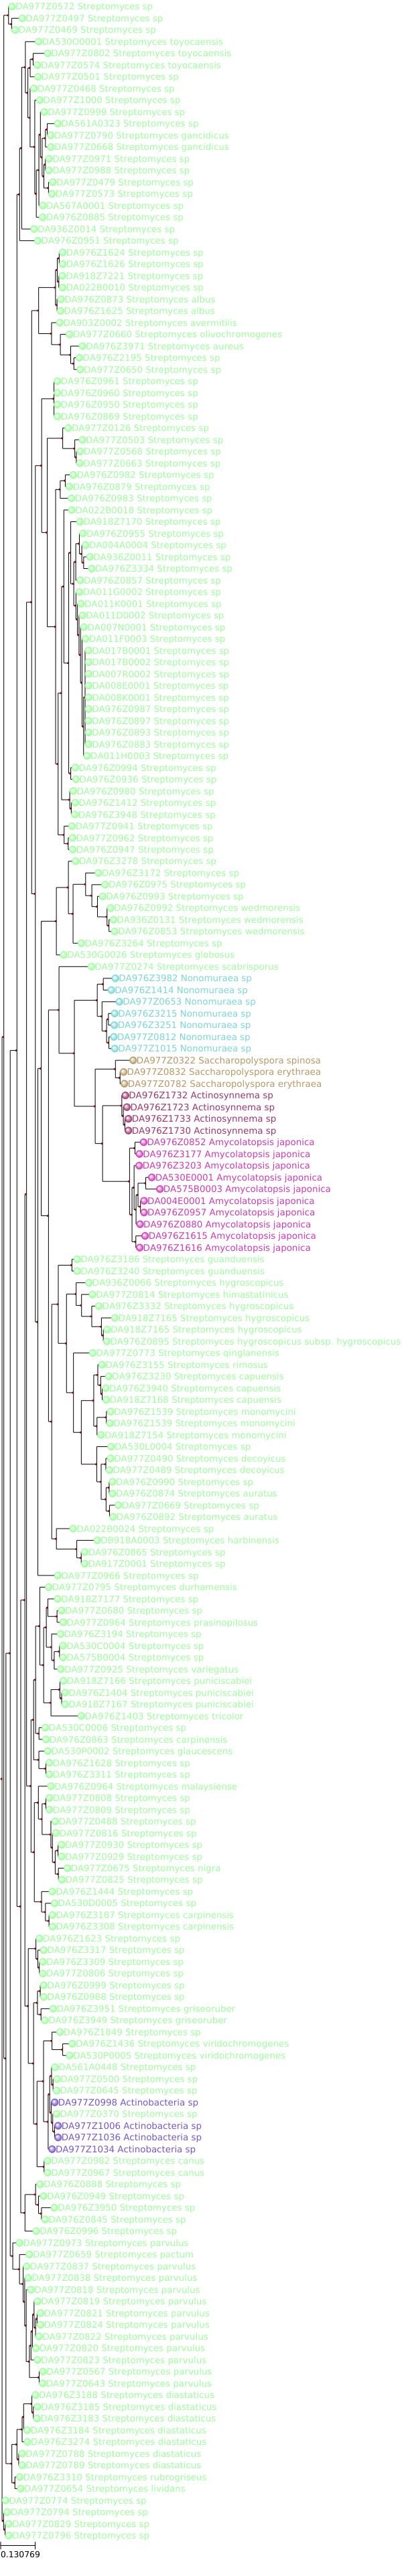

In [14]:
ts = TreeStyle()
ts.show_leaf_name = False
ts.show_branch_length = False
ts.show_branch_support = False 

# Creates my own layout function. I will use all previously created
# faces and will set different node styles depending on the type of
# node.
def mylayout(node):   
    # If node is a leaf, add the nodes name and a its scientific
    # name
    if node.is_leaf():
        # We can also create faces on the fly
        #newName = dict_nodeName.get(node.name, node.name)
        color = dict_nodeColor.get(node.name, node.name)
        #newNameFace = faces.TextFace(newName,fgcolor =color  )
        #faces.add_face_to_node(newNameFace, node, column=1, aligned=True)
        name_face = TextFace(node.name, fgcolor=color, fsize=10)
        node.add_face(name_face, column=1, position='branch-right')
        # Sets the style of leaf nodes
        node.img_style["size"] = 10
        node.img_style["shape"] = "sphere"
        node.img_style["fgcolor"] = color
    #If node is an internal node
    else:
        # Sets the style of internal nodes
        node.img_style["size"] = 2
        node.img_style["shape"] = "circle"
        node.img_style["fgcolor"] = "darkred"

ts.layout_fn = mylayout

t.img_style["size"] = 30
t.img_style["fgcolor"] = "black"

t.render(file_name="%%inline", w=600, tree_style=ts)
#t.show(tree_style=ts)

In [15]:
#t.render(file_name="tree_branch.pdf", tree_style=ts)

{'nodes': [[0.5, 5163.263998448849, 3.5, 5166.263998448849, 0, None],
  [3.0199991503281858,
   3008.5279968976974,
   6.019999150328186,
   3011.5279968976974,
   1,
   None],
  [9.891167661490748, 42.0, 12.891167661490748, 45.0, 2, None],
  [12.101461435520541, 12.5, 23.10146143552054, 23.5, 3, None],
  [14.372634195042163, 67.5, 17.372634195042163, 70.5, 4, None],
  [26.91026403551629, 46.5, 37.91026403551629, 57.5, 5, None],
  [16.582927969071957, 80.5, 27.582927969071957, 91.5, 6, None],
  [6.105879728954691,
   5975.055993795395,
   9.10587972895469,
   5978.055993795395,
   7,
   None],
  [12.307931686386132,
   4798.39323759079,
   15.307931686386132,
   4801.39323759079,
   8,
   None],
  [22.077330755995497,
   3047.8870611190796,
   25.077330755995497,
   3050.8870611190796,
   9,
   None],
  [25.935563013785924,
   562.08544921875,
   28.935563013785924,
   565.08544921875,
   10,
   None],
  [29.048208254561672,
   427.6708984375,
   32.04820825456167,
   430.6708984375,
 

In [16]:
inputDir = "/home/mlk442/FIND/mlk442/BGC_table"
os.chdir(inputDir)
count =0
gcfs = []
for strain in strains:
    cvspath =inputDir +"/" +strain+"_BGC_table.csv"
    if Path(cvspath).is_file():
        count = count+1
        strain_file = pd.read_csv(cvspath, header =1)
        gcfs.append(strain_file.GCFs.tolist())

In [17]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [18]:
new_list = []
gcfs =flatten(gcfs)
for i in range(len(gcfs)):
    if isinstance(gcfs[i], str):
        new_list.append(gcfs[i].split("_")[0])

In [19]:
def list2dict(a):
    dict_gcf = {}
    for key in a:
        dict_gcf[key] = dict_gcf.get(key, 0) + 1
    return (dict_gcf)
    

In [20]:
col_name = list(set(new_list))
col_name.append("Strain_name")
df = pd.DataFrame(columns = col_name)
gcf = []
for strain in strains:
    cvspath =inputDir +"/" +strain+"_BGC_table.csv"
    if Path(cvspath).is_file():
        gcf_name = []
        dict_gcf = {}
        strain_file = pd.read_csv(cvspath, header =1)
        gcf = strain_file.GCFs.tolist()
        for i in range(len(gcf)):
            if isinstance(gcfs[i], str):
                gcf_name.append(gcfs[i].split("_")[0])
        dict_gcfCount = list2dict(gcf_name)
        dict_gcfCount["Strain_name"] = dict_strain[strain]
        df = df.append(dict_gcfCount,ignore_index=True)        
df        

,NRPS,PKSI,Saccharides,PKSother,Others,Terpene,RiPPs,Strain_name
0,7,2,NaN,3,7,4,4,DA977Z0572 Streptomyces sp
1,6,2,NaN,3,7,4,4,DA977Z0497 Streptomyces sp
2,7,2,NaN,3,7,5,4,DA977Z0469 Streptomyces sp
3,7,2,NaN,3,8,5,4,DA530O0001 Streptomyces toyocaensis
4,6,2,NaN,3,6,4,4,DA977Z0802 Streptomyces toyocaensis
...,...,...,...,...,...,...,...,...
211,8,2,NaN,4,8,5,4,DA977Z0654 Streptomyces lividans
212,29,8,NaN,12,37,19,27,DA977Z0774 Streptomyces sp
213,11,3,NaN,6,9,7,7,DA977Z0794 Streptomyces sp
214,7,2,NaN,3,8,5,4,DA977Z0829 Streptomyces sp


In [21]:
df = df.fillna(0)
df.set_index(["Strain_name"], inplace=True)

In [22]:
df.columns.tolist()

['NRPS', 'PKSI', 'Saccharides', 'PKSother', 'Others', 'Terpene', 'RiPPs']

In [23]:
ts = TreeStyle()
ts.show_leaf_name = False
ts.show_branch_length = False
ts.show_branch_support = False 

# Creates my own layout function. I will use all previously created
# faces and will set different node styles depending on the type of
# node.
def mylayout(node):   
    # If node is a leaf, add the nodes name and a its scientific
    # name
    if node.is_leaf():
        # We can also create faces on the fly
        #newName = dict_nodeName.get(node.name, node.name)
        color = dict_nodeColor.get(node.name, node.name)
        #newNameFace = faces.TextFace(newName,fgcolor =color  )
        #faces.add_face_to_node(newNameFace, node, column=1, aligned=True)
        name_face = TextFace(node.name, fgcolor=color, fsize=10)
        node.add_face(name_face, column=1, position='branch-right')
        #F= faces.BarChartFace(df.loc[node.name,:].tolist(),labels = df.columns.tolist())
        #faces.add_face_to_node(F,node, column=1, position="branch-right",aligned=True )
        # Sets the style of leaf nodes
        node.img_style["size"] = 10
        node.img_style["shape"] = "sphere"
        node.img_style["fgcolor"] = color
    #If node is an internal node
    else:
        # Sets the style of internal nodes
        node.img_style["size"] = 2
        node.img_style["shape"] = "circle"
        node.img_style["fgcolor"] = "darkred"

ts.layout_fn = mylayout

t.img_style["size"] = 30
t.img_style["fgcolor"] = "black"

#t.render(file_name="%%inline", w=600, tree_style=ts)
t.show(tree_style=ts)

In [25]:
nameFace = AttrFace("name", fsize=12) #Set leaf node attribute

def setup_heatmap(tree, tree_style, header, center_value=0.0, nameMap ={}, nameLabel = '',
				  color_up=0.7, color_down=0.2, color_center="white"):
	DEFAULT_COLOR_SATURATION = 0.5
	BASE_LIGHTNESS = 0.7
	def gradient_color(value, max_value, saturation=0.5, hue=0.1):    
		def rgb2hex(rgb):
			return '#%02x%02x%02x' % rgb
		def hls2hex(h, l, s):
			return rgb2hex( tuple(map(lambda x: int(x*255), 
						  colorsys.hls_to_rgb(h, l, s))))
	
		lightness = 1 - (value * BASE_LIGHTNESS) / max_value
		return hls2hex(hue, lightness, DEFAULT_COLOR_SATURATION)


	# Calculate max gradient value from the ClusterTree matrix
	maxv = abs(center_value - tree.arraytable._matrix_max)
	minv = abs(center_value - tree.arraytable._matrix_min)
	if center_value <= tree.arraytable._matrix_min:
		MAX_VALUE = minv + maxv
	else:
		MAX_VALUE = max(maxv, minv)
		
	# Add heatmap colors to tree
	cols_add_before_heat = 0
	if nameMap:
		cols_add_before_heat = 1
	for lf in tree:
		if nameMap:
			longNameFace = faces.TextFace(nameMap.get(lf.name, lf.name))
			lf.add_face(longNameFace, column=0, position="aligned")
			
		for i, value in enumerate(getattr(lf, "profile", [])):
			if value > center_value:
				color = gradient_color(abs(center_value - value), MAX_VALUE, 
									   hue=color_up)
			elif value < center_value:
				color = gradient_color(abs(center_value - value), MAX_VALUE, 
									   hue=color_down)
			else:
				color = color_center
			lf.add_face(RectFace(20, 20, color, color), position="aligned", 
						column=i+cols_add_before_heat)
			# Uncomment to add numeric values to the matrix
			#lf.add_face(TextFace("%0.2f "%value, fsize=5), position="aligned", column=i)
		lf.add_face(nameFace, column=i+cols_add_before_heat+1, position="aligned")
		
	if nameMap and nameLabel:
		nameF = TextFace(nameLabel, fsize=7)
		#nameF.rotation = -90
		tree_style.aligned_header.add_face(nameF, column=0)
	# Add header 
	for i, name in enumerate(header):
		nameF = TextFace(name, fsize=7)
		nameF.rotation = -90
		tree_style.aligned_header.add_face(nameF, column=i+cols_add_before_heat)

In [30]:
data = df
data.index.name = "#Names" 
data_mat = data.to_csv(None, sep="\t", float_format="%.2f")
header = list(data.columns.values)  
data

,NRPS,PKSI,Saccharides,PKSother,Others,Terpene,RiPPs
#Names,,,,,,,
DA977Z0572 Streptomyces sp,7,2,0,3,7,4,4
DA977Z0497 Streptomyces sp,6,2,0,3,7,4,4
DA977Z0469 Streptomyces sp,7,2,0,3,7,5,4
DA530O0001 Streptomyces toyocaensis,7,2,0,3,8,5,4
DA977Z0802 Streptomyces toyocaensis,6,2,0,3,6,4,4
...,...,...,...,...,...,...,...
DA977Z0654 Streptomyces lividans,8,2,0,4,8,5,4
DA977Z0774 Streptomyces sp,29,8,0,12,37,19,27
DA977Z0794 Streptomyces sp,11,3,0,6,9,7,7


[1] leaf names could not be mapped to the matrix rows.


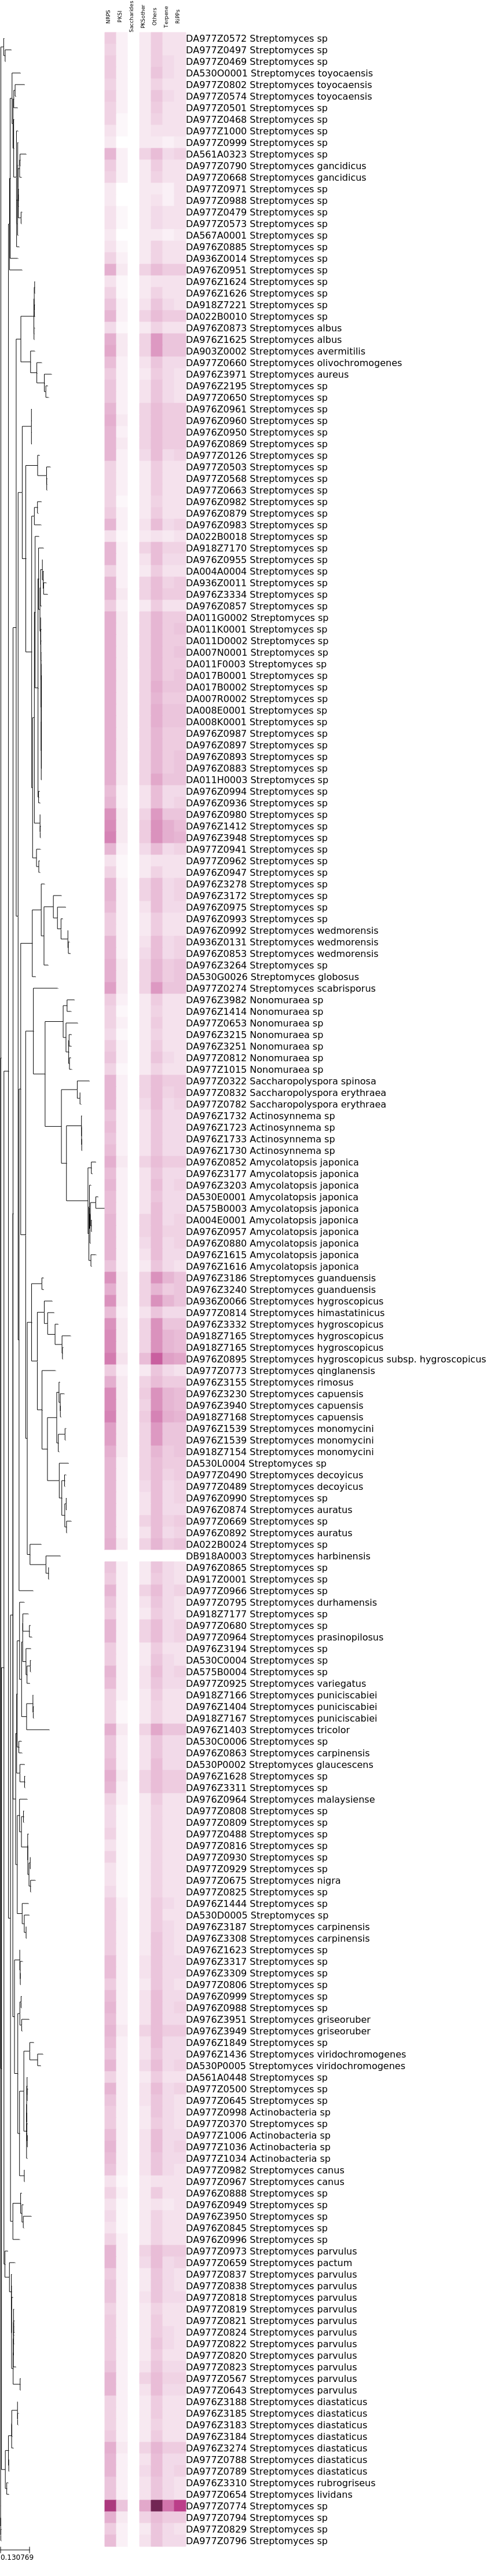

In [33]:
df.append(dict_gcfCount,ignore_index=True)
t = ClusterTree(tree, data_mat)

ts = TreeStyle()
ts.show_leaf_name = False
ts.show_branch_length = False
ts.show_branch_support = False
setup_heatmap(t, ts, header, center_value=0, color_up=0.9, color_down=0.3, color_center="white")

t.render(file_name="%%inline", tree_style=ts)

In [ ]:
dict_strain

In [ ]:
from ete3 import Tree, faces, TreeStyle, NodeStyle
from ete3 import ClusterTree, RectFace, AttrFace, ProfileFace, TextFace
from ete3.treeview.faces import add_face_to_node
import pandas as pd
import numpy as np
import colorsys

t = Tree()
t.populate(7,names_library=['A','B','C','D','E','F','G'])
## %%liline is used for showing plots in ipythonnotebook.
t.render(file_name="tree.pdf") # will save tree into pdf file
t.render(file_name="%%inline")

In [ ]:
for n in t.traverse():  # Traverse each node and set attribute for each type of nodes
    if n.is_leaf(): # Decide if leaf node
        nstyle = NodeStyle()
        nstyle["shape"] = "square"
        nstyle["size"] = 15
        nstyle["fgcolor"] = "orange"
        n.set_style(nstyle)
    else:
        nstyle = NodeStyle()
        nstyle["shape"] = "sphere"
        nstyle["size"] = 5
        nstyle["fgcolor"] = "yellow"
        n.set_style(nstyle) 
        
t.render(file_name="%%inline", tree_style=ts)

In [ ]:
#t.show(tree_style=ts)

In [ ]:
strains = list()
for leaf in t.iter_leaves():
    leaf.name
    strains.append(leaf.name)

In [34]:
text_file = open("updated_tree.txt", "w")
n = text_file.write(tree)
text_file.close()